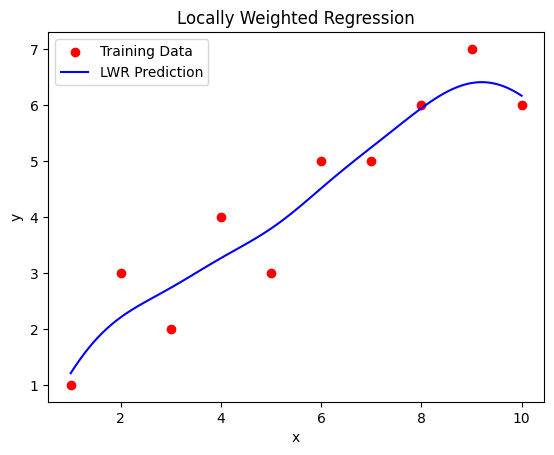

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian kernel function
def gaussian_kernel(y, x_t, tau):
    return np.exp(-((y - x_t) ** 2) / (2 * tau ** 2))

# Locally Weighted Regression function
def locally_weighted_regression(x, y, x_t, tau):
    x_b = np.c_[np.ones(len(x)), x]  # Add intercept term
    w = np.diag(gaussian_kernel(x, x_t, tau))  # Weights based on distance from x_t
    theta = np.linalg.inv(x_b.T @ w @ x_b) @ (x_b.T @ w @ y)  # Normal equation with weights
    x_t_b = np.array([1, x_t])  # Add intercept for test point
    return x_t_b @ theta  # Predict

# Training data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3, 5, 5, 6, 7, 6])

# Test data
x_test = np.linspace(1, 10, 100)
tau = 1.0

# Predict
y_pred = np.array([locally_weighted_regression(x, y, x_t, tau) for x_t in x_test])

# Plot
plt.scatter(x, y, color='red', label='Training Data')
plt.plot(x_test, y_pred, color='blue', label='LWR Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Locally Weighted Regression')
plt.show()
